
#Iris Classification

####***Load The Data***

In [2]:
#1. sys - access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.
#SciPy -  Used for scientific and technical computing
# Seaborn - provides a high-level interface for drawing attractive and informative statistical graphics.

import sys, numpy, scipy, pandas as pd, matplotlib, sklearn
import seaborn as sns


In [5]:
import warnings
warnings.filterwarnings("ignore")  # This will ignore any warnings

####***Import Library***

In [6]:
# Loading required Libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#for the training of the dataset
from sklearn.model_selection import train_test_split #80-20

#These Ml algorithm are used for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#XGBoost is an efficient and scalable implementation of gradient boosting. It is known for its speed and performance.
import xgboost as xgb

In [7]:
#Load the dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#column names in the dataset
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#dataset into datframe form
dataset = pd.read_csv(url, names= names)

###***Data Exploration***

In [8]:
#First Rows of the dataset
dataset.head(5)   #first 10 rows

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#Checking the dimension of the dataset
r, c = dataset.shape
print('This dataset has ',r,' rows and ' ,c,' columns.')

This dataset has  150  rows and  5  columns.


In [10]:
# Grouping by Class
dataset.groupby('class').size()   #counts occurance of the each values in the dataset

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

####***Statistical Summary***

In [11]:
# All descriptive statistics of a DataFrame.
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
#Concise summary of a DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###***Data Visualization of Iris dataset***

###***Univariate Plots - For better understanding of the each attributes***


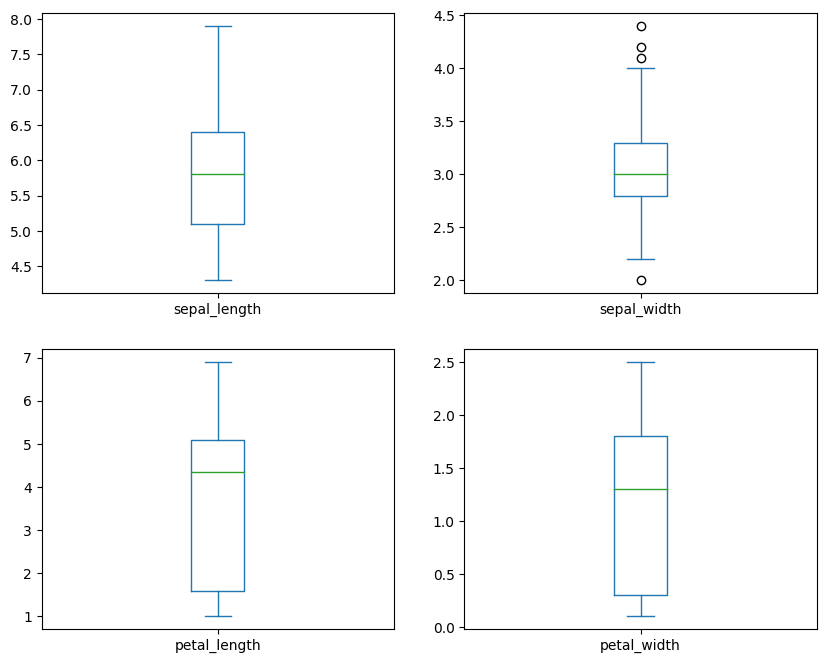

In [12]:
# plotting each variable box and wisker plot- sepal_legth, sepal_width, petal_length and petal_width
# plotting box and whiskers plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,8))
plt.show()

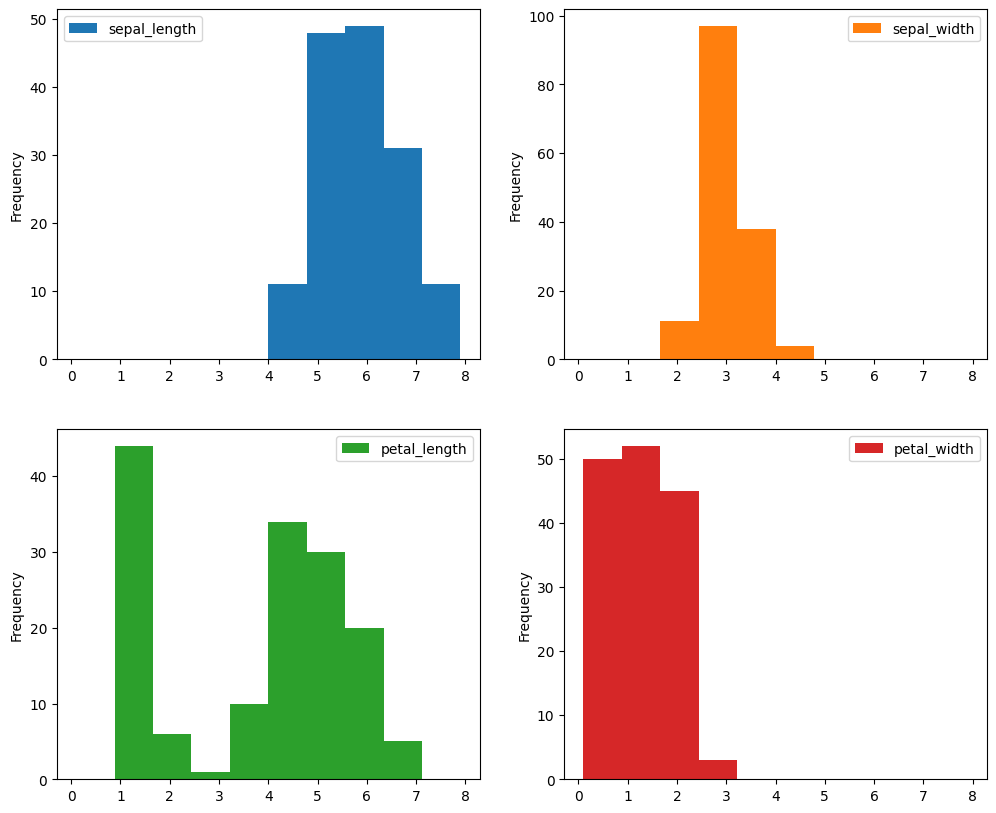

In [13]:
#plotting the histogram plot of the dataset
dataset.plot(kind='hist', subplots=True, layout = (2,2), sharex=False, sharey=False, figsize=(12,10))
plt.show()  #Every particular column visualization

###***Multivariate Plots - To understand the relationships between attributes.***


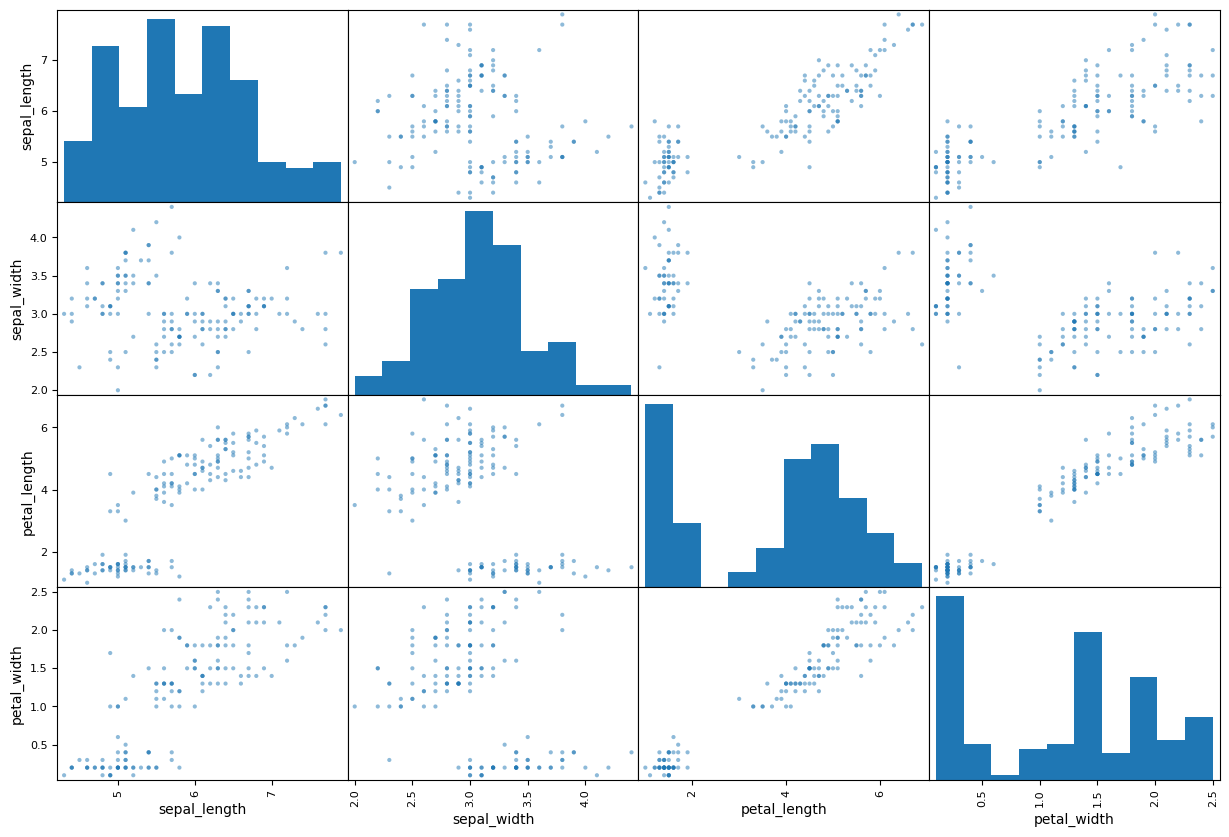

In [14]:
scatter_matrix(dataset, figsize=(15,10)) ###Ploting the scatter plot
plt.show()

###***Evaluate Algorithms - Implementing the tools and techniques for the model***


###***Create a Validation Dataset***

In [51]:
#Spliting the dataset in .8 and .2 using train-test-split
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:, 0:4]   #Defining X and y array
y = array[:, 4]
test = 0.2
seed = 53
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test, random_state = seed)

In [16]:
scoring = 'accuracy'

####***Model***


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [45]:
#multiple models for comparison or ensemble methods.
models = []
# Create a list of models

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CRT', DecisionTreeClassifier()))
models.append(('GNN', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [44]:
## Evaluate each model using k-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

# looping models in the list
for name, model in models:
#KFold is used to split the data into training and validation sets in a k-fold fashion.
#cross_val_score then performs cross-validation on the model,
#and you can specify the scoring metric (in this case, accuracy).

#create kfold object
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print(name, ': ', cv_results.mean(), cv_results.std())

LR :  0.9833333333333332 0.03333333333333335
LDA :  0.9833333333333332 0.03333333333333335
KNN :  0.9583333333333333 0.04166666666666669
CRT :  0.975 0.03818813079129868
GNN :  0.95 0.055277079839256664
SVM :  0.975 0.03818813079129868
RF :  0.9666666666666666 0.04082482904638632


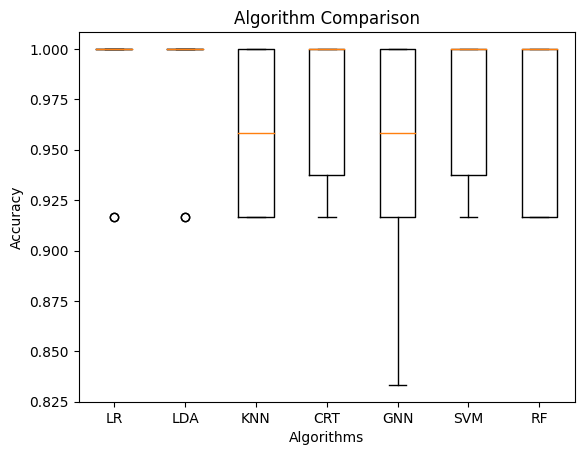

In [49]:
#Compare algorithms
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison')
plt.show()

####***Dimentionality Reduction of the dataset***

####***ETC(ExtraTreesClassifier)***

In [42]:
#importing model for ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

#setting the random_state parameter to 53.
model = ExtraTreesClassifier(random_state = 53)

# Selecting columns 0 to 3 (0-based index) for features
X = dataset.iloc[:, 0:4]
# Selecting the last column for the target variable
y = dataset.iloc[:, -1:]

# Assuming 'dataset' is your DataFrame
X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, -1:]


#fitting the model
model.fit(X, y)

#extracting feature importance from model and making a dataframe of it in descending order
ETC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ETC']).sort_values('ETC', ascending=False)

#removing traces of this model
model = None

#output
ETC_feature_importances

,ETC
petal_width,0.414580
petal_length,0.401418
sepal_length,0.121449
sepal_width,0.062553


####***RFC***

In [39]:
#setting the random_state parameter to 53
model = RandomForestClassifier(random_state = 53)

#training the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['RFC']).sort_values('RFC', ascending=False)

#removing traces of this model
model = None

#top 5 features
print("Five Features:"
      , RFC_feature_importances.head(5))

Five Features:                    RFC
petal_length  0.434537
petal_width   0.431443
sepal_length  0.105823
sepal_width   0.028197


####***ADBC***

In [32]:
#importing model for feature importance
from sklearn.ensemble import AdaBoostClassifier

#setting the random_state parameter to 53
model = AdaBoostClassifier(random_state = 53)

#fitting the model
model.fit(X, y)

# extracting feature importance from model and making a dataframe of it in descending order
ADB_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ADB']).sort_values('ADB', ascending=False)

model = None
ADB_feature_importances

,ADB
petal_length,0.54
petal_width,0.46
sepal_length,0.00
sepal_width,0.00


####***GBC***

In [30]:
#importing model for feature importance
from sklearn.ensemble import GradientBoostingClassifier   #xgboost gradient boosting classifier

#passing the model
model = GradientBoostingClassifier(random_state = 53)

#fitting the model
model.fit(X, y)

#extracting feature importance from model and making a dataframe of it in descending order
GBC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['GBC']).sort_values('GBC', ascending=False)

#removing traces of this model
model = None

#top 5 features
GBC_feature_importances.head(5)

,GBC
petal_width,0.809484
petal_length,0.173772
sepal_width,0.010275
sepal_length,0.006468


####***K Best Classifier***

In [24]:
from sklearn.feature_selection import SelectKBest

kbest = SelectKBest(k = 3).fit(X,y)
mask = kbest.get_support()
new_features = X.columns[mask]

new_features

Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')

###Prediction

In [27]:
#importing accuracy score, classification report and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lda =  DecisionTreeClassifier()
#fitting the model
lda.fit(X_train, y_train)

#predicting the X_test
predict = lda.predict(X_test)

#printing the test output
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

lda = None

0.9333333333333333
[[10  0  0]
 [ 0  9  2]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

